In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
churnData = pd.read_csv("data/DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


## Data Cleaning

In [3]:
churnData.columns = churnData.columns.str.lower()

In [4]:
churnData.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [5]:
churnData.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [6]:
churnData.monthlycharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: monthlycharges, Length: 1585, dtype: int64

In [7]:
sum(churnData.totalcharges == " ")

11

In [8]:
churnData.totalcharges.where(churnData.totalcharges != " ", 0, inplace=True)
sum(churnData.totalcharges == " ")

0

In [9]:
churnData.totalcharges = pd.to_numeric(churnData.totalcharges)
churnData.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [10]:
## Replacing nulls with mean

mean_totalcharges = np.mean(churnData.totalcharges)
mean_totalcharges

2279.734303563826

In [11]:
sum(churnData.totalcharges == 0)

11

In [12]:
churnData.totalcharges.where(churnData.totalcharges != 0, mean_totalcharges, inplace=True)

In [13]:
churnData.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
churnData.gender.unique()
churnData.seniorcitizen.unique()
churnData.partner.unique()
churnData.dependents.unique()
churnData.phoneservice.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
churnData.onlinesecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: onlinesecurity, dtype: int64

In [16]:
churnData.onlinebackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: onlinebackup, dtype: int64

In [17]:
churnData.deviceprotection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: deviceprotection, dtype: int64

In [18]:
churnData.techsupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: techsupport, dtype: int64

In [19]:
churnData.streamingtv.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streamingtv, dtype: int64

In [20]:
churnData.streamingmovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streamingmovies, dtype: int64

In [21]:
churnData.contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract, dtype: int64

In [22]:
churnData.monthlycharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: monthlycharges, Length: 1585, dtype: int64

In [23]:
churnData_num = churnData.select_dtypes(np.number) 
churnData_num

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


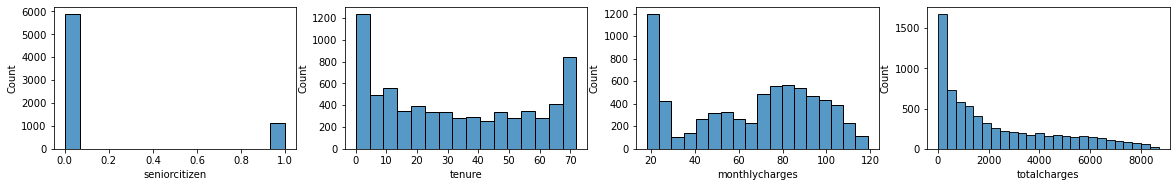

In [24]:
plt.figure(figsize=(20,12))
for i, column in enumerate(churnData_num.columns,1):
    plt.subplot(4,4,i)
    sns.histplot(churnData_num[column])

In [25]:
X = churnData_num
y = churnData.iloc[:,-1]

In [26]:
## Test/train split

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

## Running the log model

In [28]:
std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)

X_test_scaled = std_scaler.transform(X_test)
X_test_scaled

array([[-0.43814715,  0.71372312, -1.45720263, -0.53917282],
       [-0.43814715,  1.60910697, -1.4803881 , -0.37714322],
       [-0.43814715,  1.24281358,  0.14093819,  0.80663012],
       ...,
       [-0.43814715, -1.23984162, -0.43538617, -0.96844403],
       [-0.43814715, -0.30375851,  1.0319224 ,  0.02268012],
       [-0.43814715,  1.5684077 , -1.4803881 , -0.40124095]])

,Error_metric,Train,Test
0,Accuracy,0.796146,0.781354
1,Precision,0.668552,0.632653
2,Recall,0.453569,0.438163


Confusion matrix for the train set
[[3334  293]
 [ 712  591]]


/opt/anaconda3/envs/OA_DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


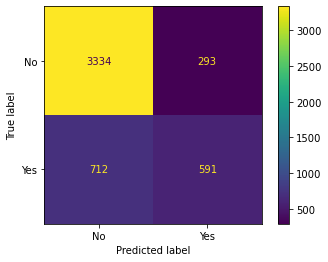



Confusion matrix for the test set
[[1403  144]
 [ 318  248]]


/opt/anaconda3/envs/OA_DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


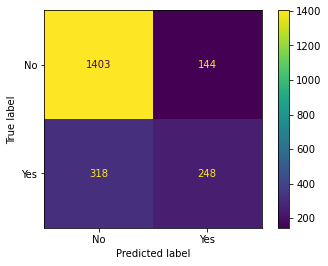

In [29]:
log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log, pos_label="Yes")]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## KNN 

In [30]:
## Transforming data

trans = PowerTransformer()
trans.fit(X_train)

X_train_knn = trans.transform(X_train)
X_test_knn  = trans.transform(X_test)

X_train_knn = pd.DataFrame(X_train, columns = X.columns)
X_test_knn  = pd.DataFrame(X_test,  columns = X.columns)

,Error_metric,Train,Test
0,Accuracy,0.796146,0.781354
1,Precision,0.668552,0.632653
2,Recall,0.453569,0.438163


Confusion matrix for the train set
[[3381  246]
 [ 449  854]]


/opt/anaconda3/envs/OA_DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


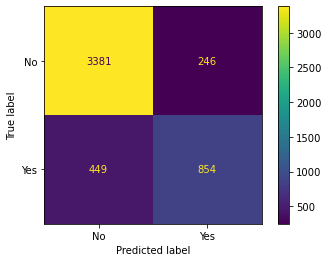



Confusion matrix for the test set
[[1320  227]
 [ 306  260]]


/opt/anaconda3/envs/OA_DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


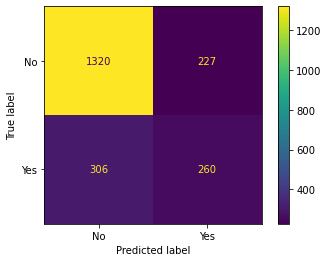

In [31]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_knn, y_train)
y_pred_train_knn = neigh.predict(X_train_knn)
y_pred_test_knn = neigh.predict(X_test_knn)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_knn,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_knn, pos_label="Yes")]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_knn,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(neigh,X_test_knn,y_test, values_format = 'd')
plt.show()

## Decision Trees 
### Num. only

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [33]:
churnData

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [34]:
X_train

,seniorcitizen,tenure,monthlycharges,totalcharges
877,0,51,60.15,3077.00
5792,1,15,96.30,1426.75
5334,0,49,107.95,5293.20
878,0,60,64.75,4039.50
6578,0,10,73.55,693.30
...,...,...,...,...
79,0,45,25.90,1216.60
3927,0,3,20.55,51.15
5955,0,72,68.40,4855.35
6936,0,5,80.15,385.00


,Error_metric,Train,Test
0,Accuracy,0.787830,0.777567
1,Precision,0.667100,0.645455
2,Recall,0.393707,0.376325


Confusion matrix for the train set
[[3371  790]
 [ 256  513]]


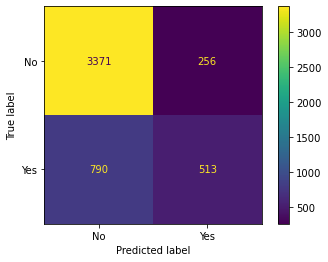



Confusion matrix for the test set
[[1430  353]
 [ 117  213]]


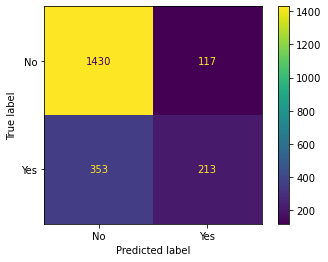

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


dt = DecisionTreeClassifier(max_depth=3, random_state=123)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

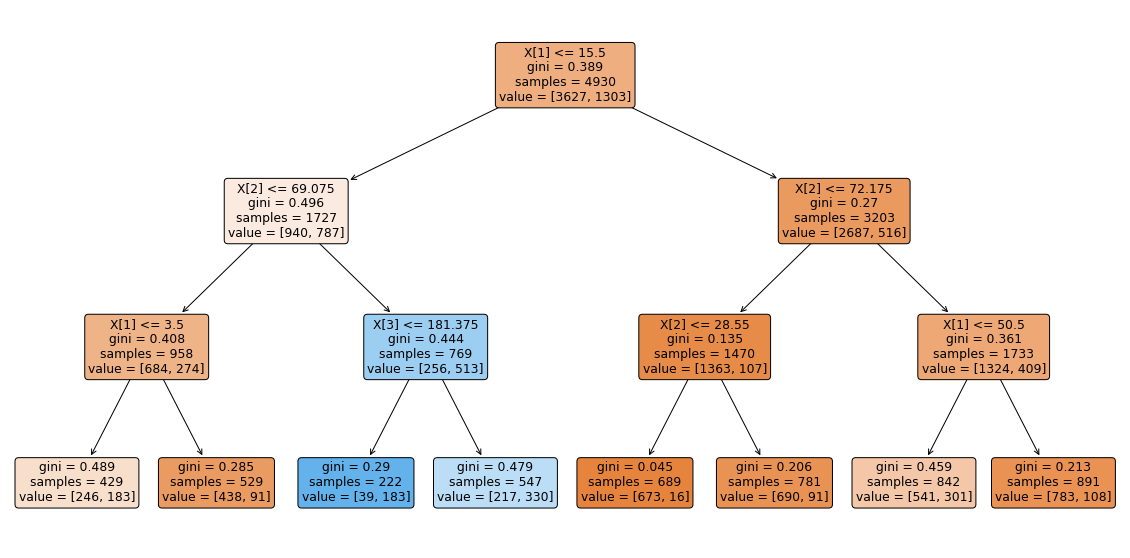

In [36]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(dt,filled = True, rounded=True)
plt.show()  

### All variables

#### Get dummies for categorical variables

In [37]:
categorical = churnData.select_dtypes(include = object)
categorical

,gender,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,No
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,No
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,No
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes


In [38]:
categorical_cols = pd.get_dummies(categorical.iloc[:,:-1], drop_first=True)
categorical_cols

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
X = pd.concat([churnData_num, categorical_cols], axis=1)
X

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,0,1,0,1,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Test/train split

y = churnData.iloc[:,-1]
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: churn, Length: 7043, dtype: object

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=100)
X_train
#y_train

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
877,0,51,60.15,3077.00,0,0,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
5792,1,15,96.30,1426.75,0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
5334,0,49,107.95,5293.20,0,1,1,1,0,0,...,0,1,0,1,0,1,0,1,0,1
878,0,60,64.75,4039.50,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
6578,0,10,73.55,693.30,0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,45,25.90,1216.60,0,1,1,1,1,0,...,1,0,1,0,1,0,1,0,1,0
3927,0,3,20.55,51.15,1,1,0,1,1,0,...,1,0,1,0,1,0,1,0,0,0
5955,0,72,68.40,4855.35,1,1,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
6936,0,5,80.15,385.00,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


,Error_metric,Train,Test
0,Accuracy,0.798783,0.772835
1,Precision,0.668108,0.605392
2,Recall,0.474290,0.436396


Confusion matrix for the train set
[[3320  685]
 [ 307  618]]


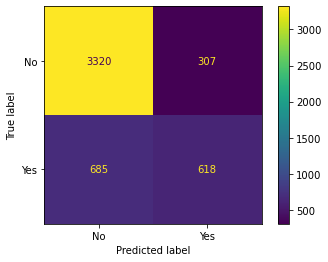



Confusion matrix for the test set
[[1386  319]
 [ 161  247]]


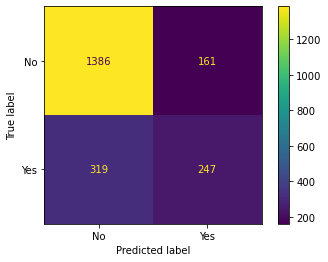

In [55]:
dt = DecisionTreeClassifier(max_depth=5, random_state=123)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

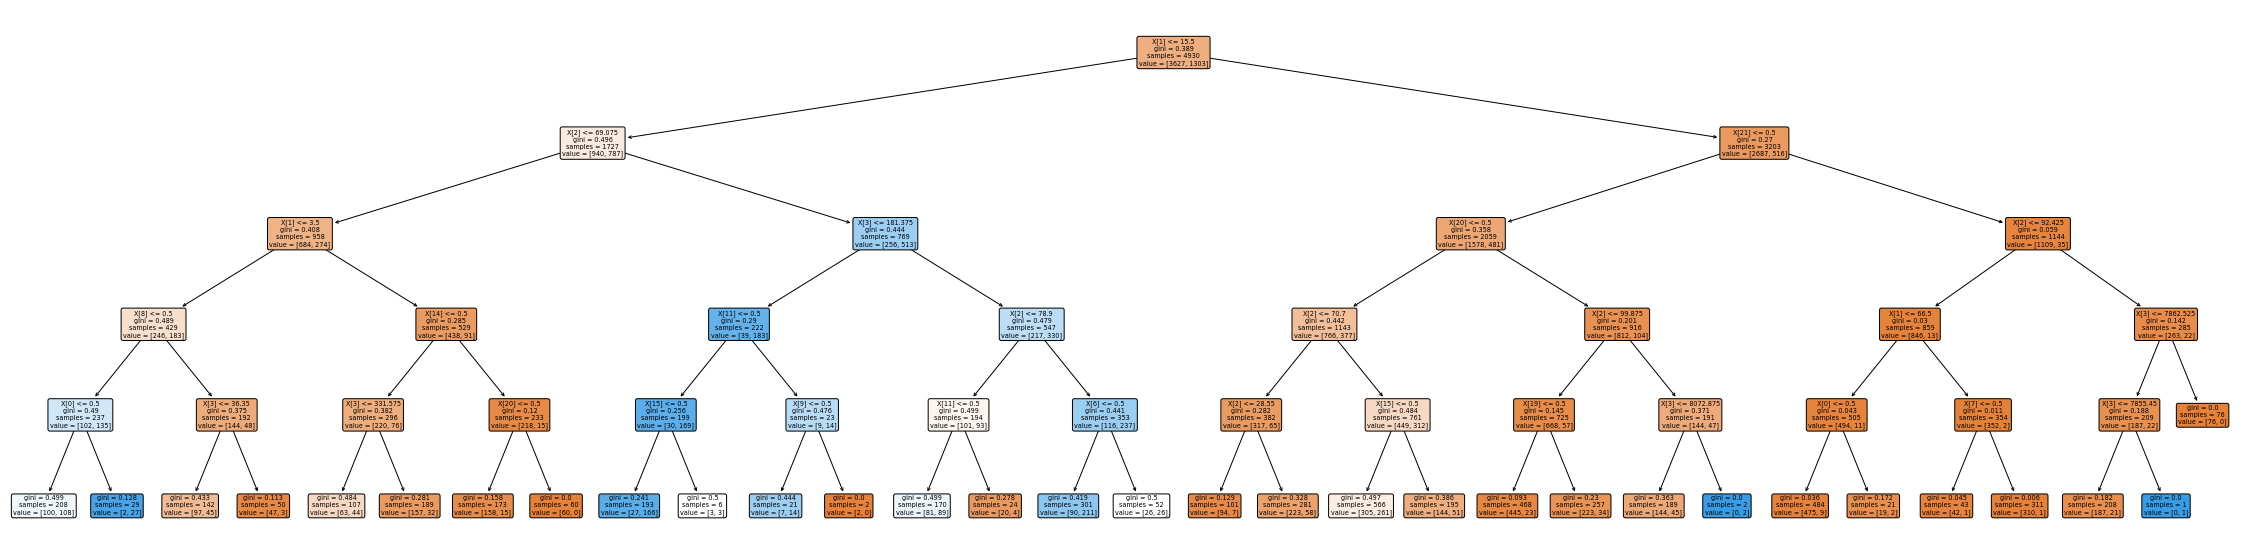

In [56]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,10))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

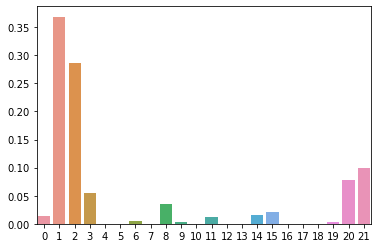

In [68]:
plot = sns.barplot(list(range(22)), dt.feature_importances_)

In [76]:
array = dt.feature_importances_
array

array([1.44978066e-02, 3.68747417e-01, 2.86582380e-01, 5.46786436e-02,
       0.00000000e+00, 0.00000000e+00, 5.85659871e-03, 4.96032414e-05,
       3.54269236e-02, 2.65345369e-03, 0.00000000e+00, 1.26569956e-02,
       0.00000000e+00, 0.00000000e+00, 1.57753934e-02, 2.13568390e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.75009653e-03,
       7.88731113e-02, 9.90947378e-02])